# Super Store Sales Profitability Analysis

## Introduction
This project analysis Super Store Sales data to understand overall sales performance,
profitability,customer behavior, and operational efficiency. The goal is to identify key
business insights using important KPIs such as total sales, profit, customer segmentation,
and shipping performance.

In [1]:
import pandas as pd 
file_path='/kaggle/input/super-store-sales-profitability-dataset/Supersales_Profitablility.xlsx'
df = pd.read_excel(file_path)
df.head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Region,State,City,Category,Sub_Category,Sales,Quantity,Discount,Total value,Discount Rate,Profit
0,O-1000,2022-01-01,2023-09-01,Standard,C-025,Ram,Consumer,North-Central,Delhi,Delhi,Furniture,Table,685,15,0.2,10275,8220,2055
1,O-1001,2022-02-11,2023-09-01,Standard,C-026,Neha,Cooperate,West-Central,Maharashtra,Mumbai,Furniture,Sofas,12000,10,0.2,120000,96000,24000
2,O-1002,2022-03-01,2023-09-01,Standard,C-027,Vikram,Cooperate,North-Central,Uttar Pradesh,Lucknow,Office Supplies,Printers,30000,4,0.2,120000,96000,24000
3,O-1003,2022-04-01,2023-09-01,Standard,C-028,John,Cooperate,East-India,Jharkhand,Ranchi,Furniture,Chair,400,8,0.2,3200,2560,640
4,O-1004,2022-05-01,2023-09-01,Standard,C-029,James,Consumer,West-Central,Maharashtra,Pune,Furniture,Table,1200,10,0.2,12000,9600,2400


In [2]:
total_sales = df['Sales'].sum()
total_sales

np.int64(15291285)

In [3]:
df.columns = df.columns.str.strip()
df.columns

Index(['Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_ID',
       'Customer_Name', 'Segment', 'Region', 'State', 'City', 'Category',
       'Sub_Category', 'Sales', 'Quantity', 'Discount', 'Total value',
       'Discount Rate', 'Profit'],
      dtype='object')

In [4]:
total_profit = df['Profit'].sum()
total_profit

np.int64(14047557)

In [5]:
gross_profit_margin = (total_profit/total_sales)* 100
print("Gross Profit Margin (%):",round(gross_profit_margin,2))

Gross Profit Margin (%): 91.87


In [6]:
total_quantity = df['Quantity'].sum()
print("Total quantity sold:",total_quantity)

Total quantity sold: 10754


## Profitability KPIs
- **Total Profit** shows overall earnings.
- **Gross Profit Margin (%)** indicates profitability efficiency.
- **Total Quantity Sold** represents totalm unit sold.

In [7]:
avg_order_value = df['Sales'].mean()
avg_order_value

np.float64(30521.526946107784)

In [8]:
units_per_transaction = df['Quantity'].mean()
round(units_per_transaction, 2)

np.float64(21.47)

### Units per Transaction
This metric represents the average number of units sold per transaction.

In [9]:
customer_segment = df[['Sales','Profit']].sum()
customer_segment

Sales     15291285
Profit    14047557
dtype: int64

### Customer Segmentation
Customer segmentation helps identify which product categories contribute the most to sales and profit.

In [10]:
df.columns = df.columns.str.strip()
profit_by_region = df.groupby('Region')['Profit'].sum()
profit_by_region

Region
Central-India       182190
East-Central       1450720
East-India          918750
North-Central      2669975
North-East         2185000
North-India        1553104
North-West          584760
South               680438
South-Central       934580
South-India         393200
South-West          321600
Union-Territory     260060
West-Central        980720
West-India          932460
Name: Profit, dtype: int64

In [11]:
 df['Order_Date'] = pd.to_datetime(df['Order_Date'])
 df['Ship_Date'] = pd.to_datetime(df['Ship_Date'])
 df['Shipping_Delay_Days'] = (df['Ship_Date'] - df['Order_Date']).dt.days
 shipping_performance = df.groupby('Ship_Mode')['Shipping_Delay_Days'].mean()
 shipping_performance

Ship_Mode
Same Day         59.372093
Second Class    292.277228
Standard        397.777778
Name: Shipping_Delay_Days, dtype: float64

### Shipping Performance
Shipping Performance is analyse during the average number of days between order date and ship date for each shipping mode.

In [12]:
cltv = df['Profit'].sum() / df['Customer_ID'].nunique()
round(cltv, 2)

np.float64(28039.04)

### Customer Lifetime Value (CLTV)
CLTV represent the average profit generated per customer.

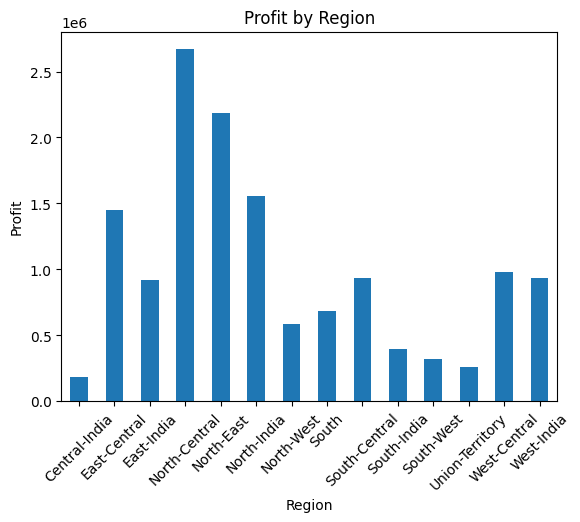

In [13]:
import matplotlib.pyplot as plt

profit_by_region.plot(kind ='bar')
plt.title('Profit by Region')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()

In [14]:
import matplotlib.pyplot as plt

sales_by_category = df.groupby('Category')['Sales'].sum()
sales_by_category

Category
Furniture          8726775
Office Supplies     136120
Technology         6428390
Name: Sales, dtype: int64

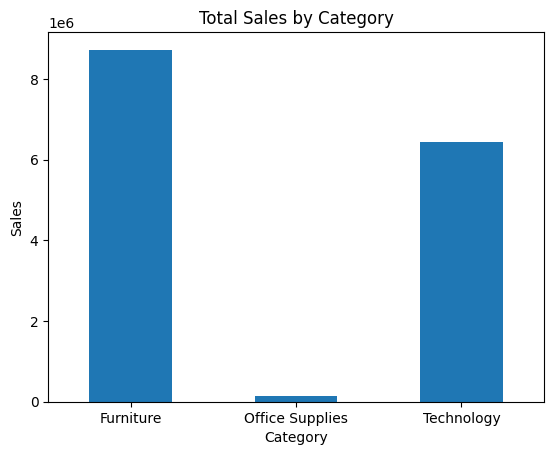

In [15]:
sales_by_category.plot(kind='bar')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.show()

### Total sales by category
This bar chart shows total sales contribution by each product category.it helps identify high-performing categories and areas requiring improvement.

In [16]:
profit_by_region = df.groupby('Region')['Profit'].sum()
profit_by_region

Region
Central-India       182190
East-Central       1450720
East-India          918750
North-Central      2669975
North-East         2185000
North-India        1553104
North-West          584760
South               680438
South-Central       934580
South-India         393200
South-West          321600
Union-Territory     260060
West-Central        980720
West-India          932460
Name: Profit, dtype: int64

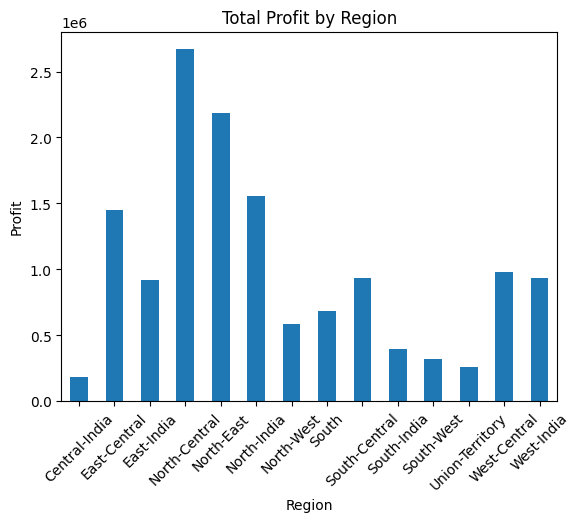

In [17]:
import matplotlib.pyplot as plt

profit_by_region.plot(kind='bar')
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()

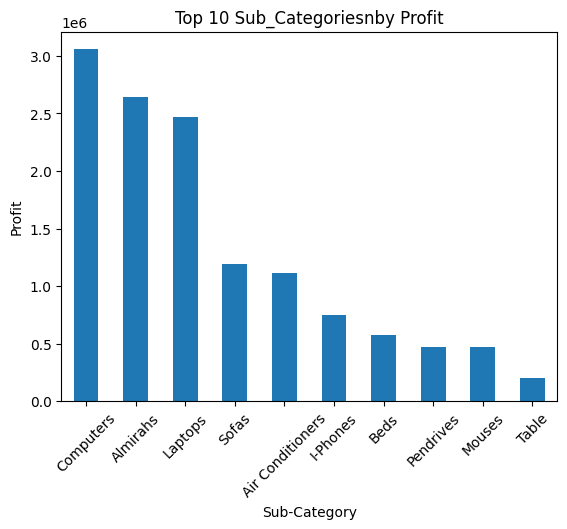

In [18]:
profit_by_subcat =df.groupby('Sub_Category')['Profit'].sum().sort_values(ascending=False).head(10)

profit_by_subcat.plot(kind='bar')
plt.title('Top 10 Sub_Categoriesnby Profit')
plt.xlabel('Sub-Category')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()

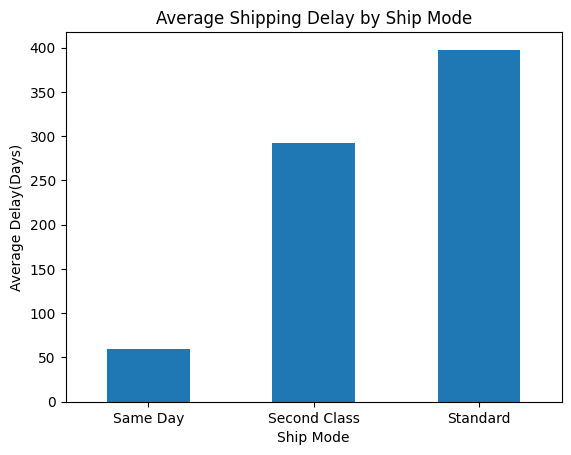

In [19]:
shipping_performance.plot(kind='bar')
plt.title('Average Shipping Delay by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Average Delay(Days)')
plt.xticks(rotation=0)
plt.show()